# HW 2
- Import and load the data
- EDA
- Preprocess data
- Split data
-


# Import the Data

In [285]:
from statistics import LinearRegression

# Import my data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.extmath import density

boston_df = pd.read_csv('../data/Boston.csv')
cali_df = pd.read_csv('../data/California.csv')

# Preview data for Boston
- I will use the Boston data first then use the california dataset

In [286]:
# Data for Boston
boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [287]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [288]:
boston_df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [289]:
boston_df.shape

(506, 15)

In [290]:
boston_df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

 No missing values....

# EDA

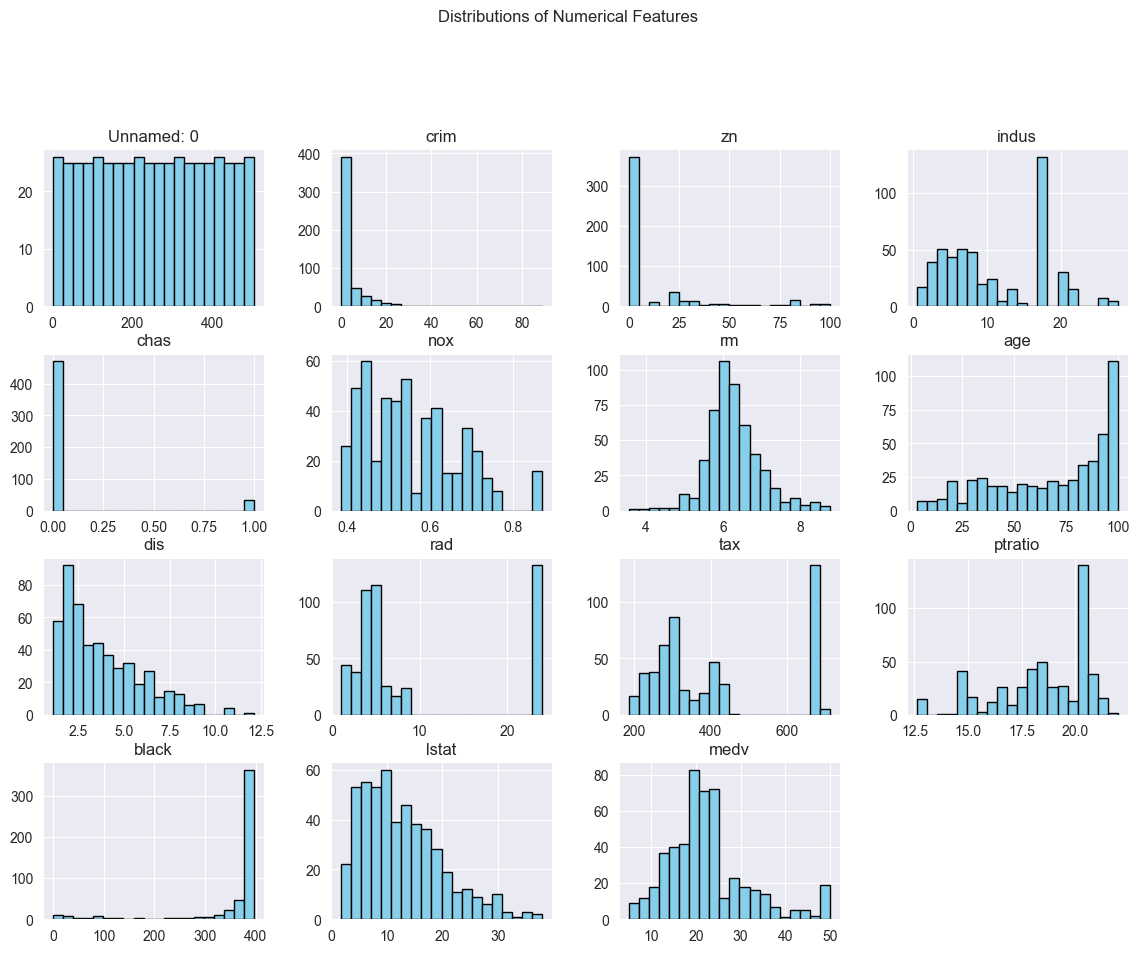

In [291]:
# Distributions for Numerical Features...
num_cols = boston_df.select_dtypes(include=np.number).columns
boston_df[num_cols].hist(figsize=(14,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", y=1.02)
plt.show()

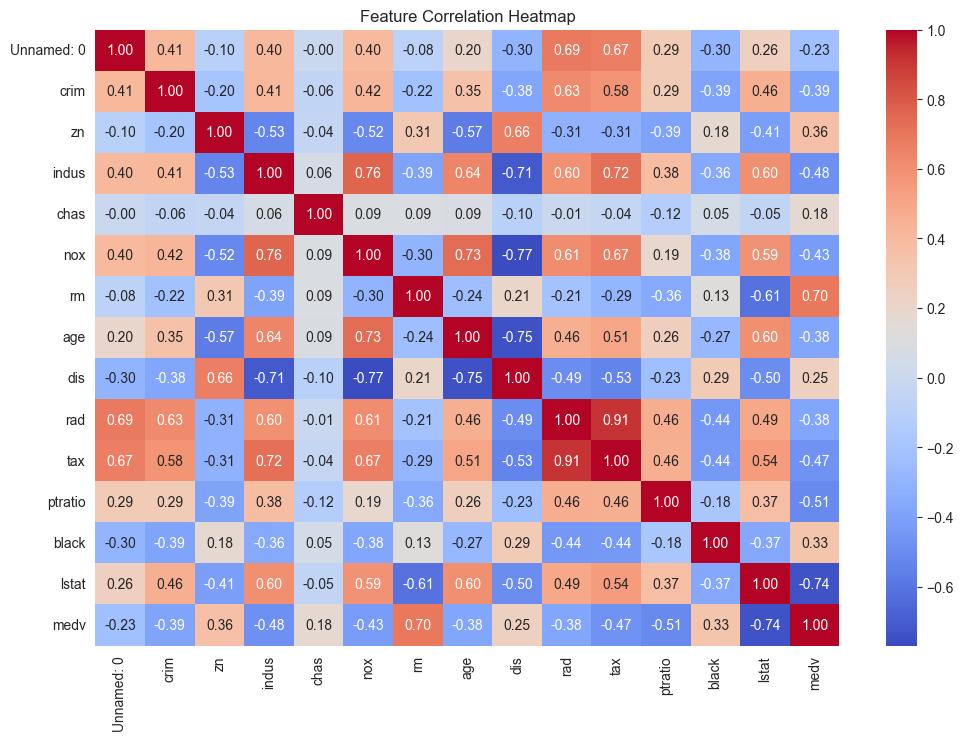

In [292]:
# I'm thinking of using a heatmap to see what feature are correlated ( might not use this)
corr = boston_df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

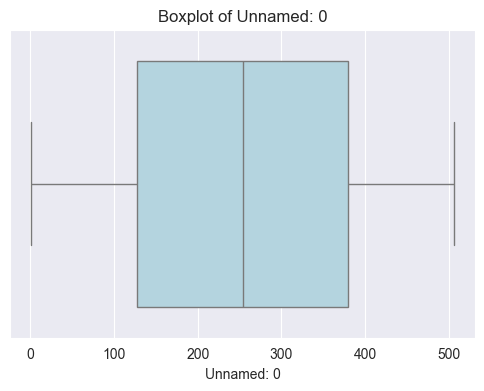

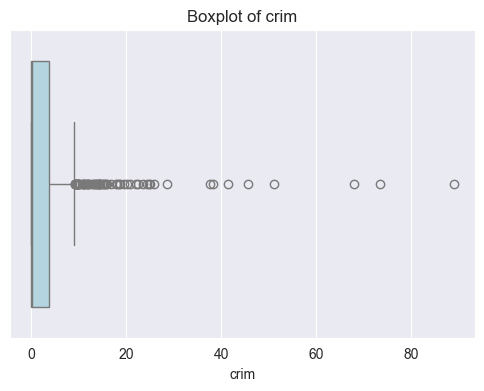

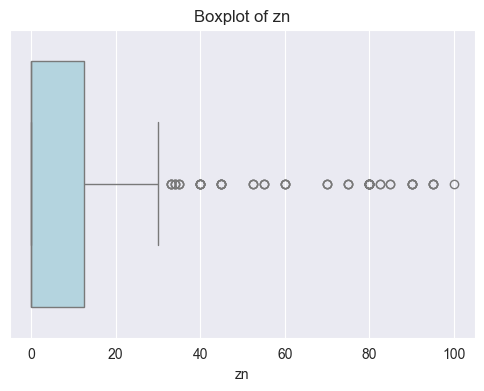

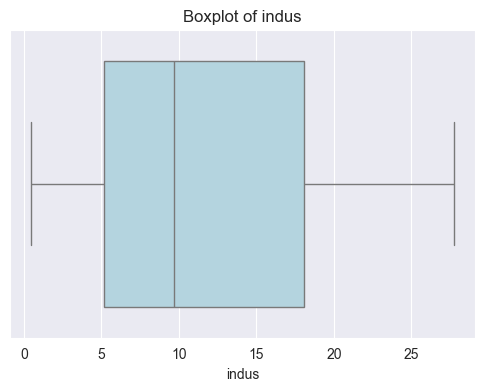

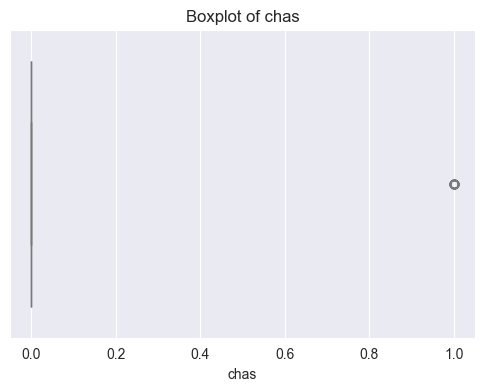

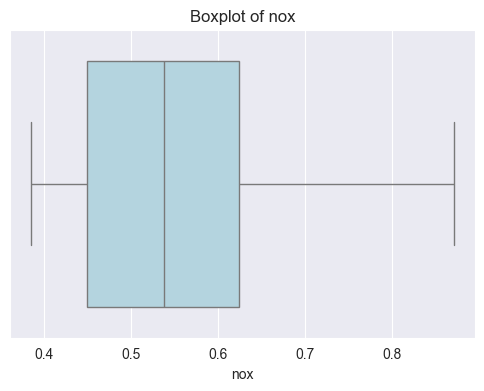

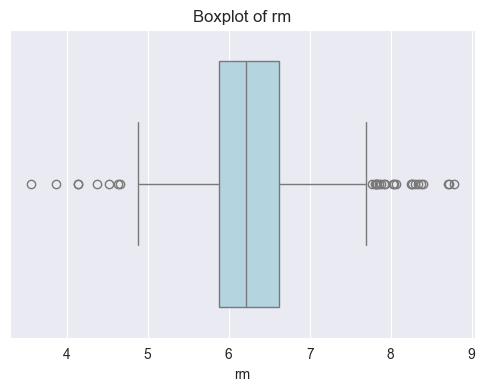

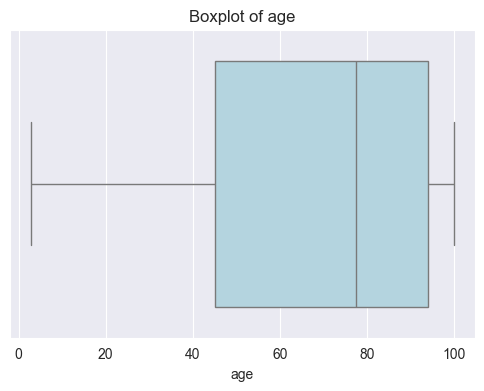

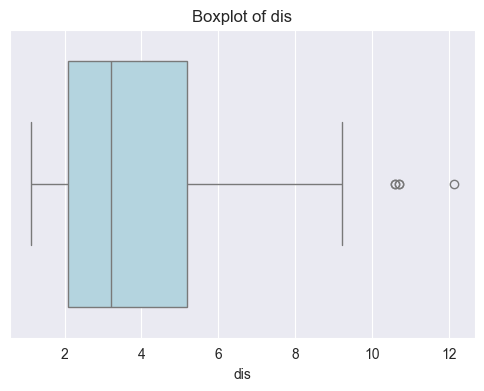

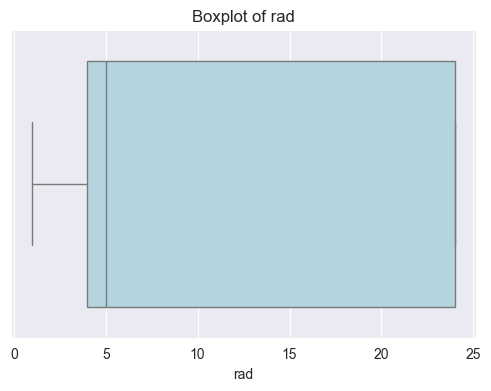

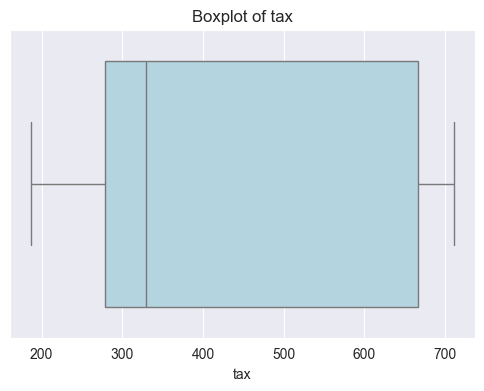

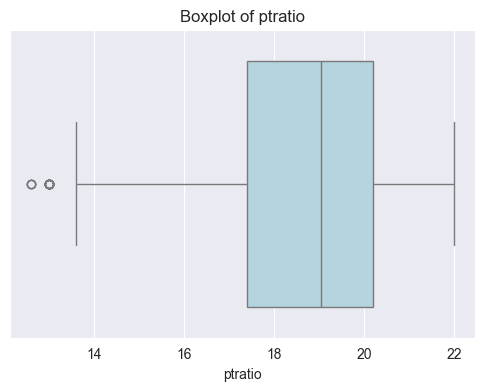

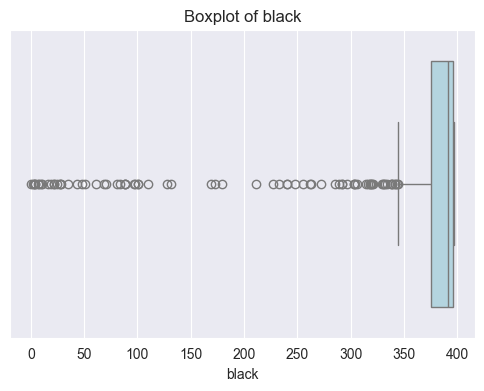

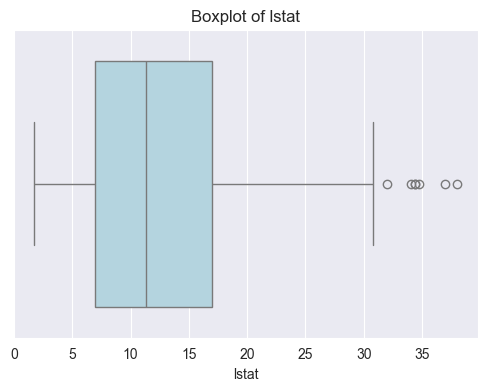

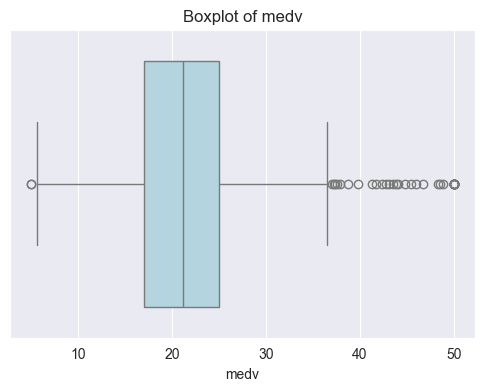

In [293]:
# Looking for outliers with boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=boston_df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.show()


# Notes:
- Crim, Zn, black are skwewed columns, because of outliers(I will handle this after)
- Chas is all 0 so that feature won't be used
- I can drop, but I will just ignore it for now


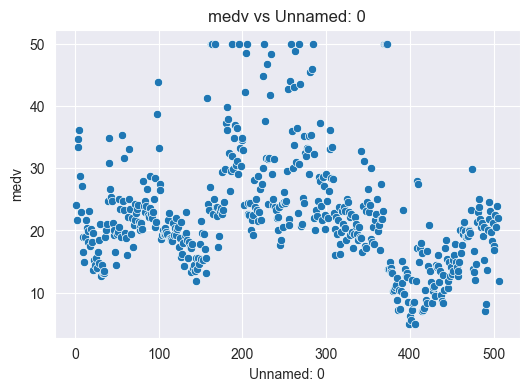

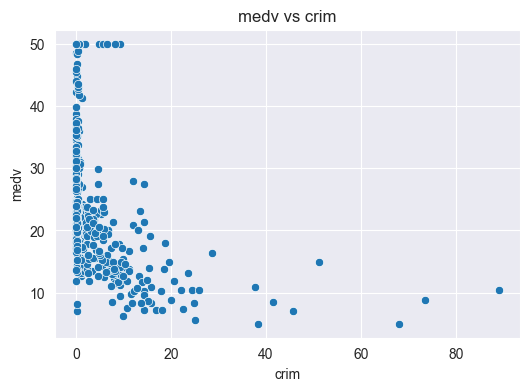

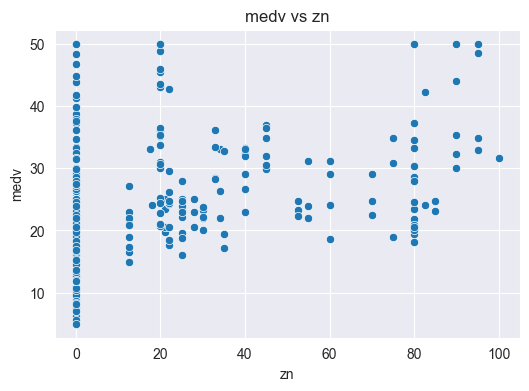

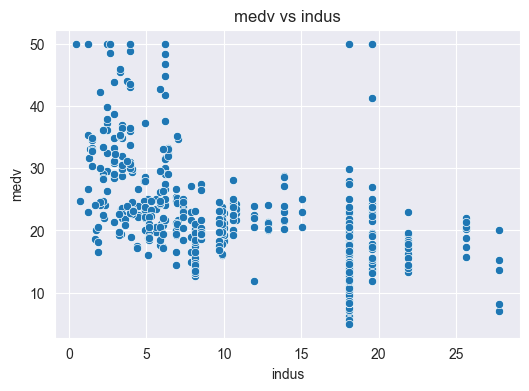

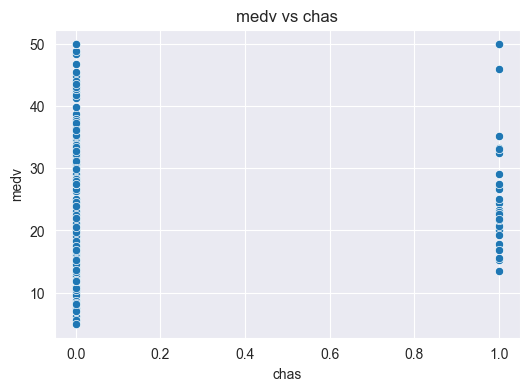

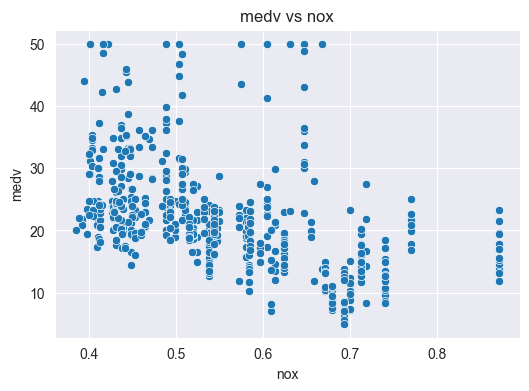

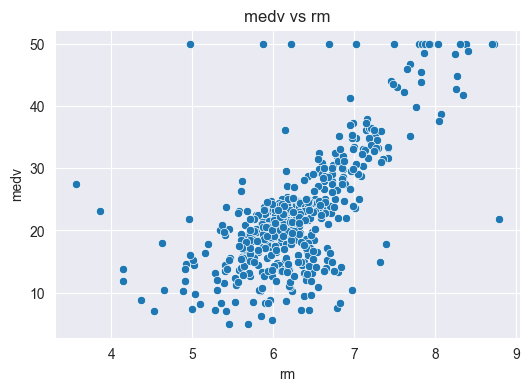

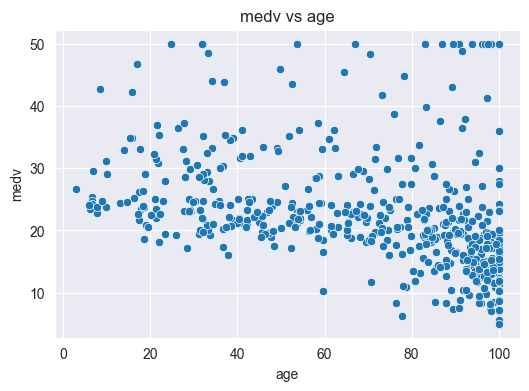

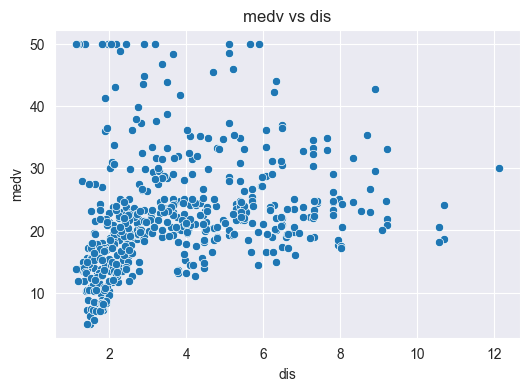

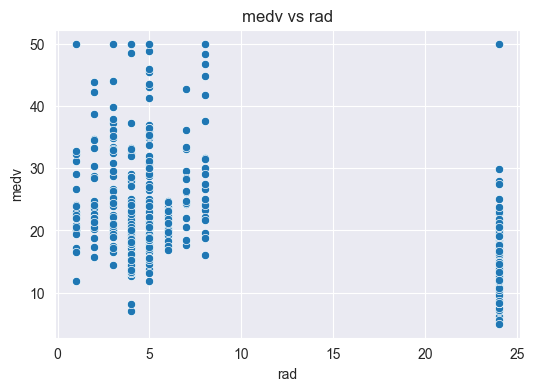

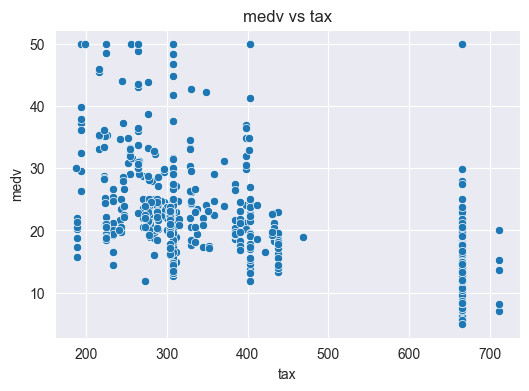

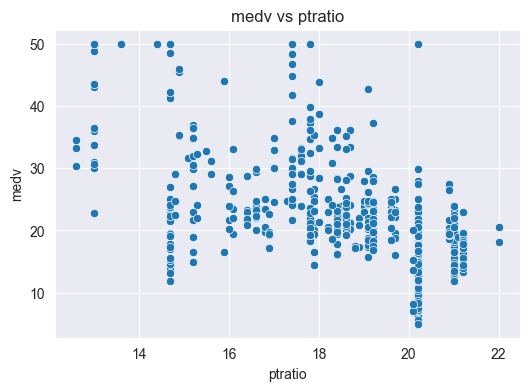

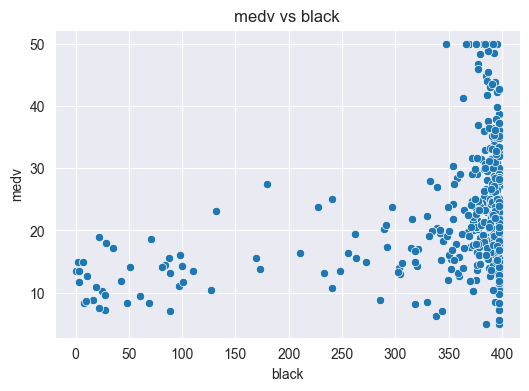

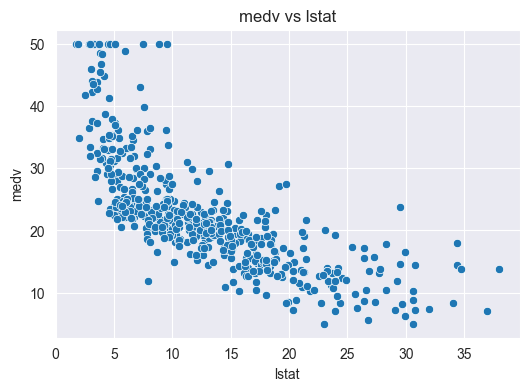

In [294]:
# Plot for correlation between all features and the target variable medv
target = 'medv'

# Continuous vs Target
for col in boston_df.columns:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=boston_df[col], y=boston_df[target])
        plt.title(f"{target} vs {col}")
        plt.show()

# Handling skewed features
Since I can see the skewed columns I will use log transformation to account for this (I asked gemini about this and it recommended using log transformation).
I will preform this transformation on:
- zn
- crim
- black

In [295]:
# Applying the log transformation to the skewed features
from scipy.stats import skew
from numpy import log1p

skew_cols = ['crim', 'zn', 'black']
for col in skew_cols:
    # Applying log1p for robustness against zeros/small numbers
    boston_df[col] = log1p(boston_df[col])

In [296]:
# Getting the numbers for correlation
boston_df.corr(numeric_only=True)['medv'].sort_values(ascending=False)


medv          1.000000
rm            0.695360
zn            0.384007
black         0.290198
dis           0.249929
chas          0.175260
Unnamed: 0   -0.226604
age          -0.376955
rad          -0.381626
nox          -0.427321
crim         -0.464084
tax          -0.468536
indus        -0.483725
ptratio      -0.507787
lstat        -0.737663
Name: medv, dtype: float64

Here I can see the most correlated features are:
- Room(Strong Positive)
- lstat(Strong Negative)
- ptratio(Moderate)
- nox(Moderate)
- tax(Moderate)

These are the most correlated features but for the model training I will use all the features except fore medv(target) and chas(low correlation and mostly zero)

# Data Preprocessing and Splitting

In [297]:
# Imports....
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define X and y(dropping the medv(target variable) and chas(low correlation, not needed))
X = boston_df.drop(['medv', 'chas','Unnamed: 0'], axis=1)
y = boston_df['medv']

# Splitting the data(70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List for metrics later
model_results = []

# Implement and Evaluate the Models:
List of models:
- Least Squares Linear Regression
- Ridge Regression
- LASSO Regression
- Elastic Net Regression
- K- Nearest Regression

### 1. Least Square Linear Regression

In [298]:
# Imports....
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For the list
model_name = 'Least Squares Linear Regression'

# Least Squares Linear Regression
lsr_model = LinearRegression()

# Fit the model using the scaled features
lsr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lsr_model.predict(X_test_scaled)

# Evaluation Metrics
lsr_mse = mean_squared_error(y_test, y_pred)
lsr_rmse = np.sqrt(lsr_mse)
lsr_r2 = r2_score(y_test, y_pred)

# Print out the metrics
print("RMSE for Least Square Linear Regression is: ", lsr_rmse)
print("R^2 for Least Square Linear Regression is: ", lsr_r2)

# List for creating a list all the evalution metrics for each model(needed at the end)
model_results.append({
    'Model': model_name,
    'RMSE': lsr_rmse,
    'R2 Score': lsr_r2,
    'Hyperparameters': 'N/A' # N/A for standard Linear Regression
})



RMSE for Least Square Linear Regression is:  4.666965769578052
R^2 for Least Square Linear Regression is:  0.7076947437437306


### 2. Ridge Regression

In [299]:
# Imports...
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# For the list
model_name = "Ridge Regression"

# Using different alpha values
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV. It uses cross-validation (cv=5) to find the best alpha.
# 'neg_mean_squared_error' is used as the scoring metric (GridSearch maximizes it).
ridge_grid = GridSearchCV(estimator=Ridge(),
                          param_grid=ridge_param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=0)
# Fit the model using the scaled features
ridge_grid.fit(X_train_scaled, y_train)

# Select the best model found by the grid search
best_ridge_model = ridge_grid.best_estimator_
best_alpha = ridge_grid.best_params_['alpha']

# Predictions
ridge_y_pred = best_ridge_model.predict(X_test_scaled)

# Evaluation Metrics
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Print out the metrics
print("RMSE for Ridge Regression is: ", ridge_rmse)
print("R^2 for Ridge Regression is: ", ridge_r2)
print("Best alpha for Ridge Regression is: ", best_alpha)

# Add it to the list
model_results.append({
    'Model': model_name,
    'RMSE': ridge_rmse,
    'R2 Score': ridge_r2,
    'Hyperparameters': f"alpha: {best_alpha}"
})


RMSE for Ridge Regression is:  4.683707481251303
R^2 for Ridge Regression is:  0.705593820753978
Best alpha for Ridge Regression is:  10


### 3. LASSO Regression

In [300]:
# Imports...
from sklearn.linear_model import Lasso

# For the list...
model_name = 'Lasso Regression'

# Using different values for alpha
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV.
lasso_grid = GridSearchCV(estimator=Lasso(max_iter=10000),
                          param_grid=lasso_param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=0)
# Fit the model
lasso_grid.fit(X_train_scaled, y_train)

# Select the model based on the grid search
best_lasso_model = lasso_grid.best_estimator_
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Predictions
lasso_y_pred = best_lasso_model.predict(X_test_scaled)

# Evaluation Metrics
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_y_pred)

# Print out the metrics
print("RMSE for Lasso Regression is: ", lasso_rmse)
print("R^2 for Lasso Regression is: ", lasso_r2)
print("Best alpha for Lasso Regression is: ", best_alpha_lasso)

# Add it to the list
model_results.append({
    'Model': model_name,
    'RMSE': lasso_rmse,
    'R2 Score': lasso_r2,
    'Hyperparameters': f"alpha: {best_alpha_lasso}"
})

RMSE for Lasso Regression is:  4.669846351513065
R^2 for Lasso Regression is:  0.7073337944082931
Best alpha for Lasso Regression is:  0.01


### 4. Elastic Net Regression

In [301]:
# Imports
from sklearn.linear_model import ElasticNet

# For the list
model_name = 'ElasticNet Regression'

# Define the hyperparameters to search (alpha and l1_ratio)
elastic_param_grid = {
    'alpha': [0.01, 0.1, 1, 10],  # Overall penalty strength
    'l1_ratio': [0.1, 0.5, 0.9]    # Mix between L1 (0.9) and L2 (0.1)
}

# Initialize GridSearchCV.
elastic_grid = GridSearchCV(estimator=ElasticNet(max_iter=10000),
                            param_grid=elastic_param_grid,
                            scoring='neg_mean_squared_error',
                            cv=5,
                            verbose=0)

# Fit the model
elastic_grid.fit(X_train_scaled, y_train)

# Choose the best model based on the grid search
best_elastic_model = elastic_grid.best_estimator_
best_elastic_params = elastic_grid.best_params_

# Predictions
elastic_y_pred = best_elastic_model.predict(X_test_scaled)

# Evaluation Metrics
elastic_mse = mean_squared_error(y_test, elastic_y_pred)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, elastic_y_pred)

# Print out the metrics
print("RMSE for Elastic Regression is: ", elastic_rmse)
print("R^2 for Elastic Regression is: ", elastic_r2)
print("Best Parameters for Elastic Regression is: ", best_elastic_params)

# Add to  the list
model_results.append({
    'Model': model_name,
    'RMSE': elastic_rmse,
    'R2 Score': elastic_r2,
    'Hyperparameters': str(best_elastic_params)
})

RMSE for Elastic Regression is:  4.672686558065052
R^2 for Elastic Regression is:  0.7069776862238226
Best Parameters for Elastic Regression is:  {'alpha': 0.01, 'l1_ratio': 0.1}


### 5. KNN Regression

In [302]:
# Imports...
from sklearn.neighbors import KNeighborsRegressor

# For the list
model_name = 'KNN Regression'

# Trying to find the best value for k
knn_param_grid = {'n_neighbors': [3, 5, 9, 15]}

# Initialize GridSearchCV.
knn_grid = GridSearchCV(estimator=KNeighborsRegressor(),
                        param_grid=knn_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        verbose=0)
# Fit the model
knn_grid.fit(X_train_scaled, y_train)

# Pick the best model
best_knn_model = knn_grid.best_estimator_
best_knn_params = knn_grid.best_params_['n_neighbors']

# Predictions
knn_y_pred = best_knn_model.predict(X_test_scaled)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_y_pred)

# Print out the metrics
print("RMSE for KNN Regression is: ", knn_rmse)
print("R^2 for KNN Regression is: ", knn_r2)
print("Best K for KNN Regression is: ", best_knn_params)

# Add it to the list
model_results.append({
    'Model': model_name,
    'RMSE': knn_rmse,
    'R2 Score': knn_r2,
    'Hyperparameters': f"K: {best_knn_params}"
})

RMSE for KNN Regression is:  3.487998429032856
R^2 for KNN Regression is:  0.8367249011973382
Best K for KNN Regression is:  3


So a smaller k is better for this data...

# Model Results and Comparison

In [303]:
# Dataframe for results
results_df = pd.DataFrame(model_results)
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='RMSE', ascending=False, inplace=True)
print(results_df)

                                     RMSE  R2 Score  \
Model                                                 
Ridge Regression                 4.683707  0.705594   
ElasticNet Regression            4.672687  0.706978   
Lasso Regression                 4.669846  0.707334   
Least Squares Linear Regression  4.666966  0.707695   
KNN Regression                   3.487998  0.836725   

                                                  Hyperparameters  
Model                                                              
Ridge Regression                                        alpha: 10  
ElasticNet Regression            {'alpha': 0.01, 'l1_ratio': 0.1}  
Lasso Regression                                      alpha: 0.01  
Least Squares Linear Regression                               N/A  
KNN Regression                                               K: 3  


### Plots for Comparison

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Ridge Regression'),
  Text(1, 0, 'ElasticNet Regression'),
  Text(2, 0, 'Lasso Regression'),
  Text(3, 0, 'Least Squares Linear Regression'),
  Text(4, 0, 'KNN Regression')])

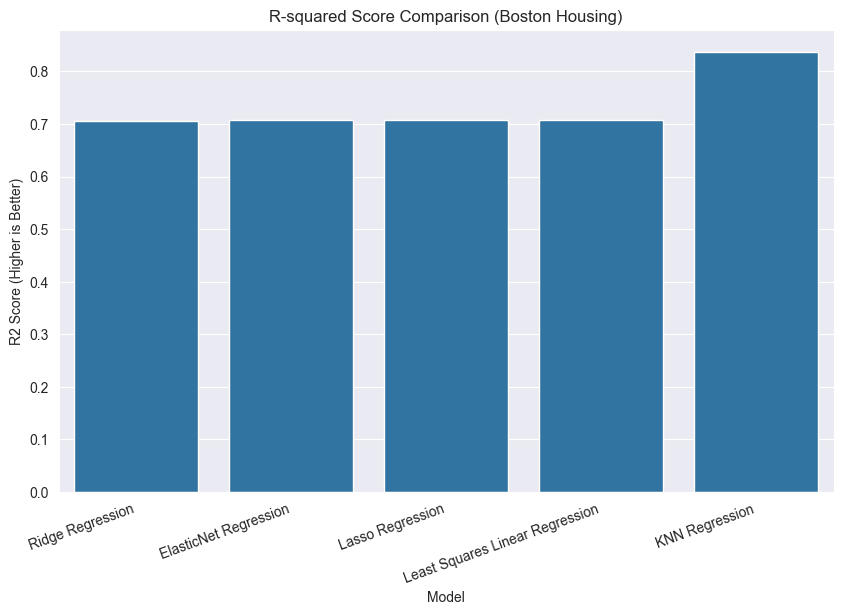

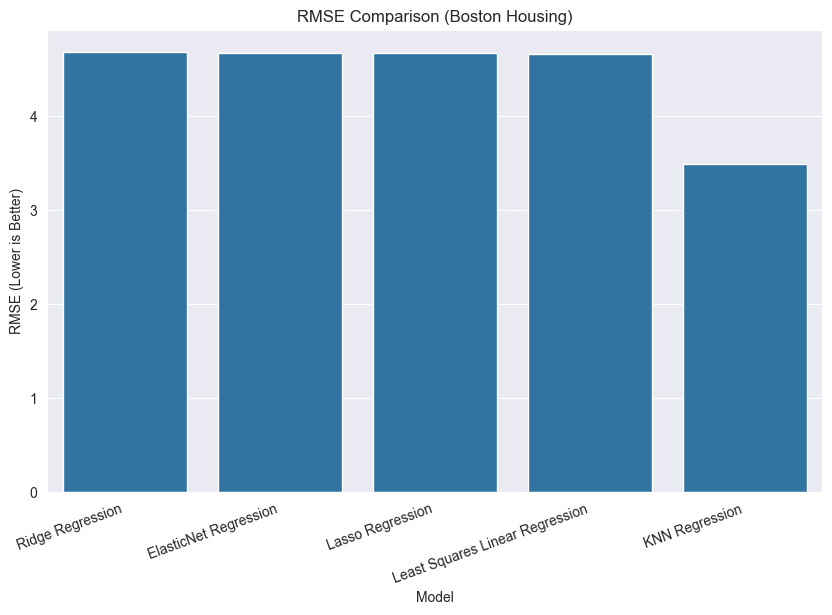

In [304]:
# --- R2 Score Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R2 Score', data=results_df)
plt.title('R-squared Score Comparison (Boston Housing)')
plt.ylabel('R2 Score (Higher is Better)')
plt.xticks(rotation=20, ha='right')



# --- RMSE Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='RMSE', data=results_df)
plt.title('RMSE Comparison (Boston Housing)')
plt.ylabel('RMSE (Lower is Better)')
plt.xticks(rotation=20, ha='right')


### Plot for comparing predicted vs actual values(for best model-KNN)

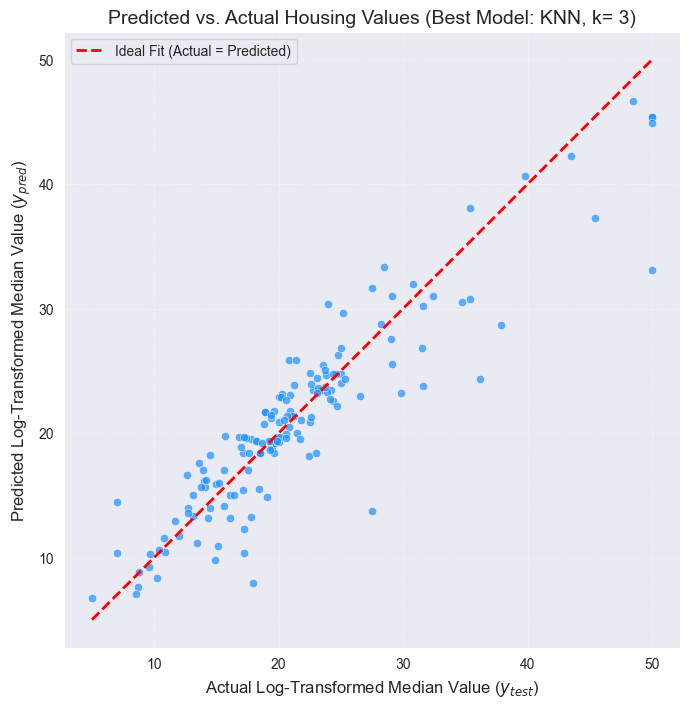

In [305]:
plt.figure(figsize=(8, 8))

# 1. Scatter Plot of Predicted vs. Actual Values
# A perfect model would have all points lie exactly on the 45-degree line.
sns.scatterplot(x=y_test, y=knn_y_pred, color='dodgerblue', alpha=0.7)

# 2. Plot the Ideal Fit Line (45-degree line: Actual = Predicted)
# We find the min and max values to draw a straight line.
min_val = min(y_test.min(), knn_y_pred.min())
max_val = max(y_test.max(), knn_y_pred.max())
ideal_line = np.linspace(min_val, max_val, 100)

plt.plot(ideal_line, ideal_line, color='red', linestyle='--', linewidth=2, label='Ideal Fit (Actual = Predicted)')

# 3. Customizations
plt.title(f'Predicted vs. Actual Housing Values (Best Model: KNN, k= 3)', fontsize=14)
plt.xlabel('Actual Log-Transformed Median Value ($y_{test}$)', fontsize=12)
plt.ylabel('Predicted Log-Transformed Median Value ($y_{pred}$)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# Preview of California

In [306]:
cali_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [307]:
cali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [308]:
cali_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [309]:
cali_df.shape

(20640, 10)

In [310]:
cali_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

207 missing values for total_bedrooms. Since this column is missing many values I will replace the missing values with the average of values for total bedrooms. I could've dropped the column, but I feel it is an import column and would be too many values to drop. Will fix this during data preprocessing.

# EDA

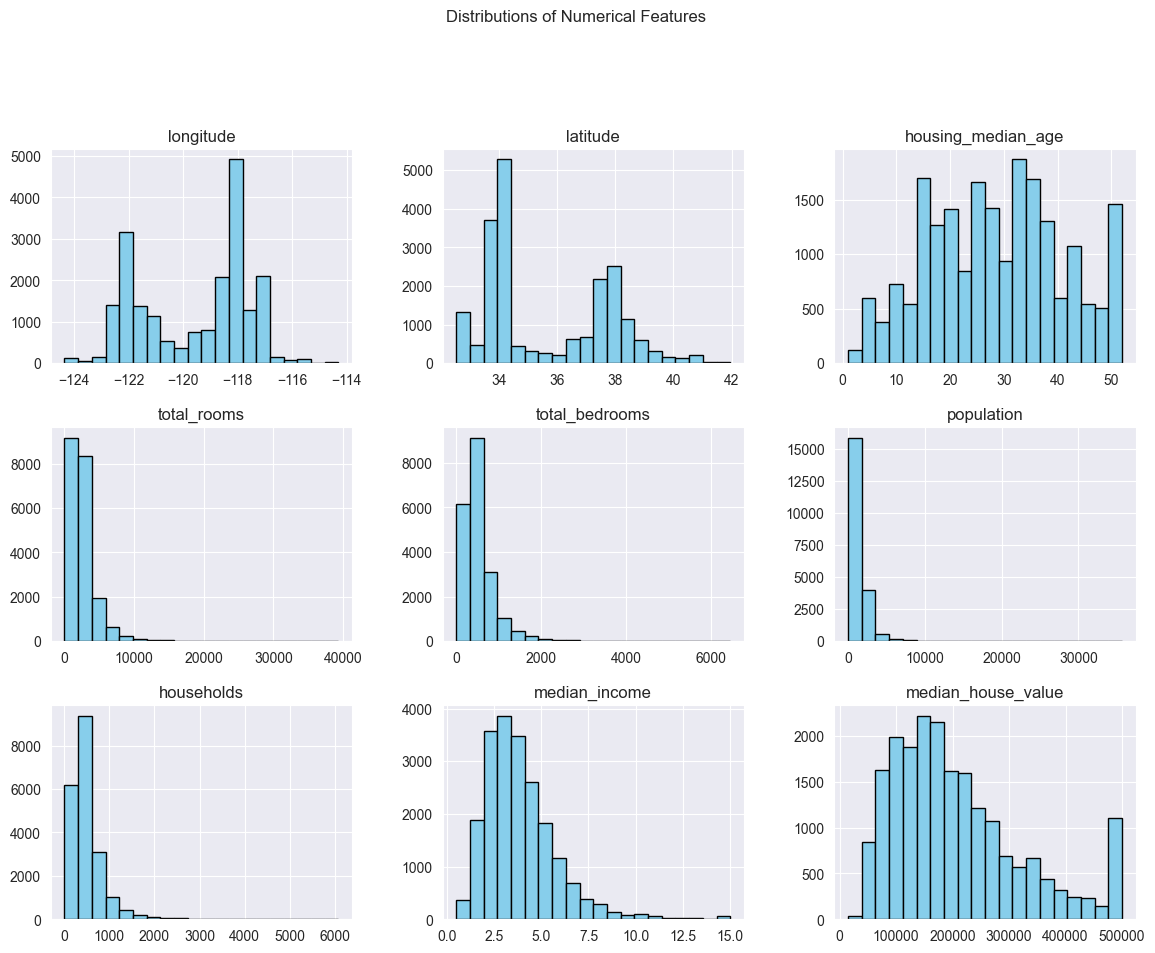

In [311]:
# Distributions for Numerical Features...
cali_num_cols = cali_df.select_dtypes(include=np.number).columns
cali_df[cali_num_cols].hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", y=1.02)
plt.show()

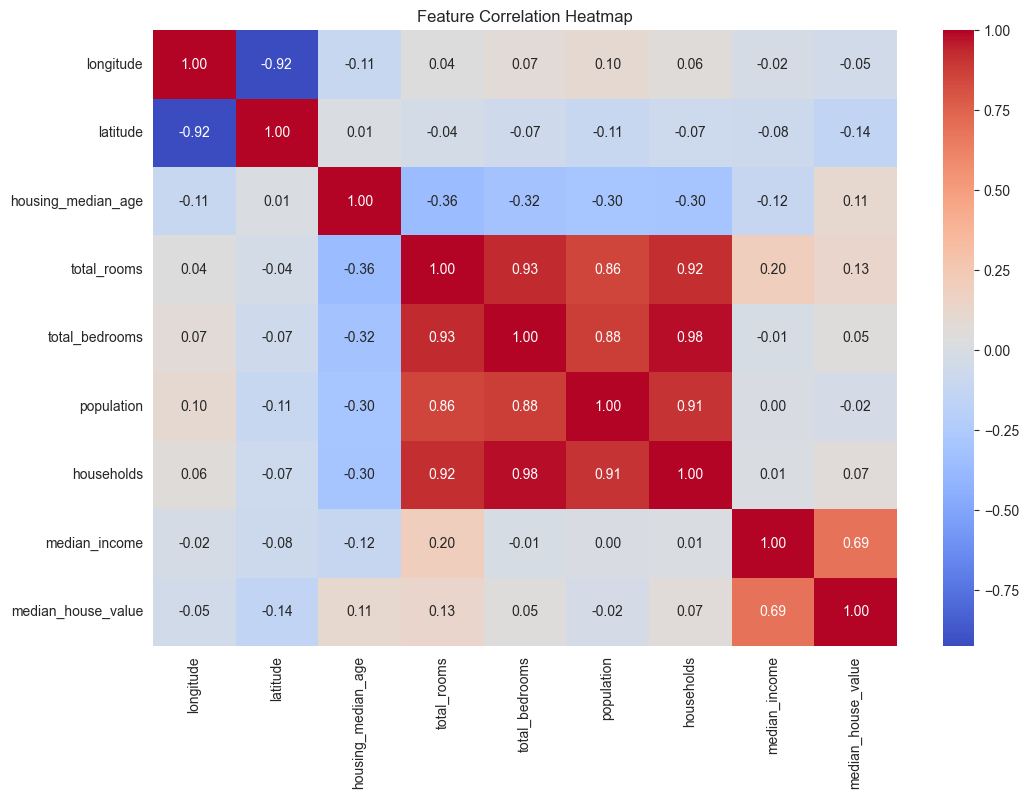

In [312]:
# I'm thinking of using a heatmap to see what feature are correlated ( might not use this)
corr = cali_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


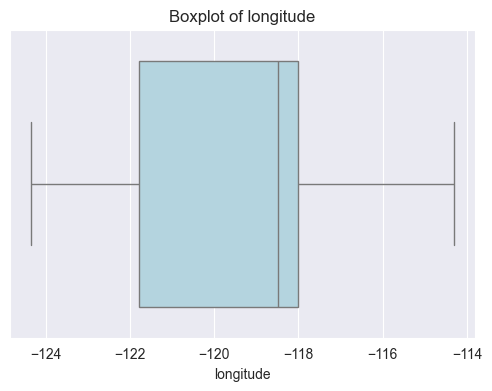

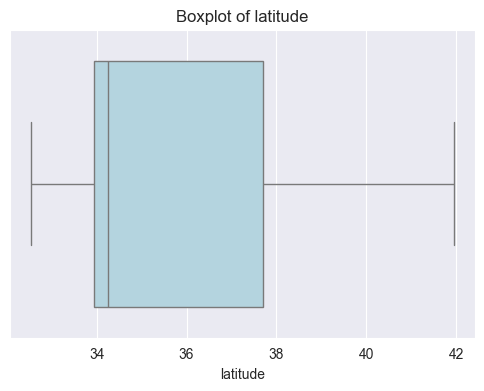

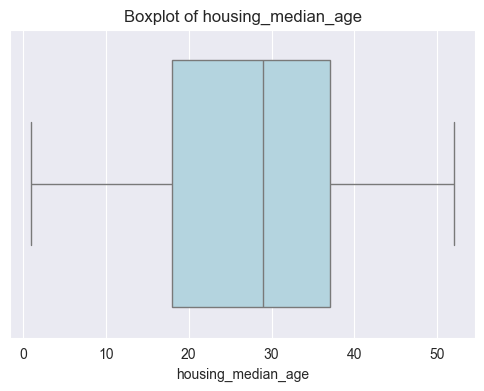

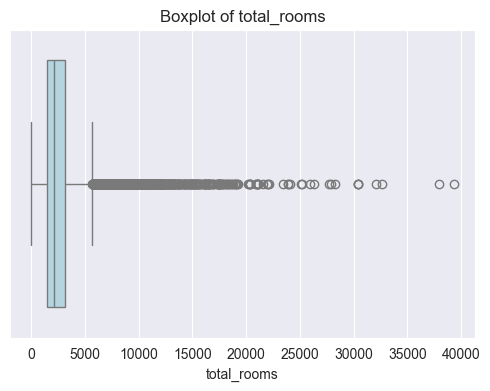

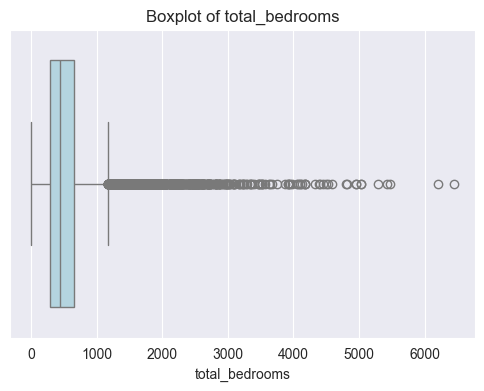

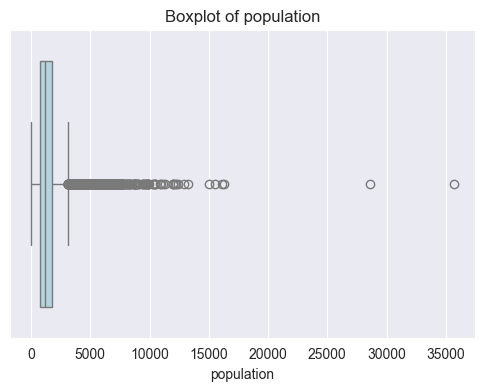

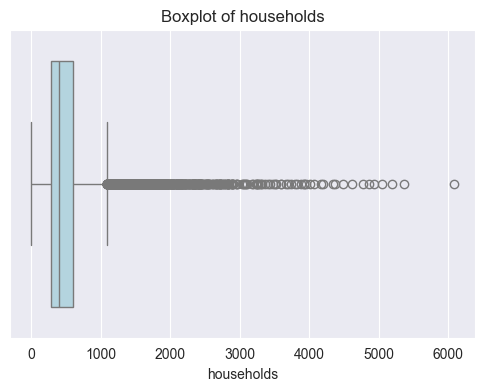

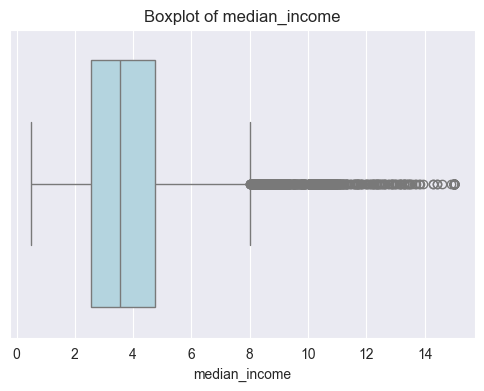

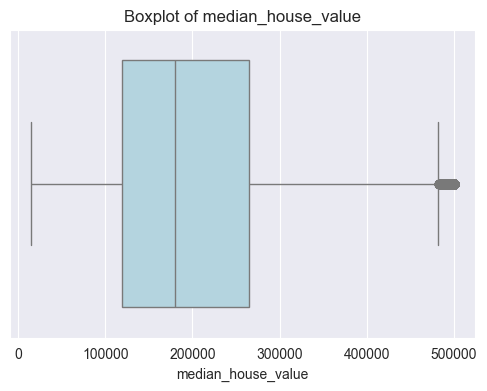

In [313]:
# Looking for outliers with boxplots
for col in cali_num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cali_df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

Here I can see some skewed data like ther was for the boston data. I will preform the same transformation for these features(rooms, total bedrooms,population, and households)

# Data Preprocessing and Splitting

In [314]:
# Replacing the missing values of total_bedroom with the median
median_bedrooms = cali_df['total_bedrooms'].median()
cali_df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

C:\Users\George\AppData\Local\Temp\ipykernel_16304\2156751728.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cali_df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


In [315]:
# Handling the skewed data
cali_skew_cols = ["total_rooms", 'total_bedrooms', 'population', 'households', 'median_house_value']
for col in cali_skew_cols:
    # Applying log1p for robustness against zeros/small numbers
    cali_df[col] = log1p(cali_df[col])
# Getting the numbers for correlation
cali_df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.658431
total_rooms           0.186376
households            0.113635
total_bedrooms        0.087238
housing_median_age    0.076007
population            0.026385
longitude            -0.023209
latitude             -0.192596
Name: median_house_value, dtype: float64

In [316]:
# More data preprocessing
# 1.2. Handle Categorical Features: One-Hot Encode 'ocean_proximity'
cali_df = pd.get_dummies(cali_df, columns=['ocean_proximity'], drop_first=True)

# 1.3. Feature Engineering: Create ratios and drop raw counts
cali_df['rooms_per_household'] = cali_df['total_rooms'] / cali_df['households']
cali_df['bedrooms_per_room'] = cali_df['total_bedrooms'] / cali_df['total_rooms']
cali_df['population_per_household'] = cali_df['population'] / cali_df['households']

# Drop the original count columns
cali_df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)


In [317]:
# Define X and y
#Dropping because thats the target variable
X = cali_df.drop('median_house_value', axis=1)
y = cali_df['median_house_value']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For the list later
cali_model_results = []

# Implement and Evaluate the Models:
List of models:
- Least Squares Linear Regression
- Ridge Regression
- LASSO Regression
- Elastic Net Regression
- K- Nearest Regression

### 1. Least Squares Linear Regression

In [318]:
# Imports....
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For the list
model_name = 'Least Squares Linear Regression'

# Least Squares Linear Regression
lsr_model = LinearRegression()

# Fit the model using the scaled features
lsr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lsr_model.predict(X_test_scaled)

# Evaluation Metrics
lsr_mse = mean_squared_error(y_test, y_pred)
lsr_rmse = np.sqrt(lsr_mse)
lsr_r2 = r2_score(y_test, y_pred)

# Print out the metrics
print("RMSE for Least Square Linear Regression is: ", lsr_rmse)
print("R^2 for Least Square Linear Regression is: ", lsr_r2)

# List for creating a list all the evalution metrics for each model(needed at the end)
cali_model_results.append({
    'Model': model_name,
    'RMSE': lsr_rmse,
    'R2 Score': lsr_r2,
    'Hyperparameters': 'N/A' # N/A for standard Linear Regression
})

RMSE for Least Square Linear Regression is:  0.3334214419903173
R^2 for Least Square Linear Regression is:  0.6568243481607648


### 2. Ridge Regression

In [319]:
# Imports...
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# For the list
model_name = "Ridge Regression"

# Using different alpha values
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV. It uses cross-validation (cv=5) to find the best alpha.
# 'neg_mean_squared_error' is used as the scoring metric (GridSearch maximizes it).
ridge_grid = GridSearchCV(estimator=Ridge(),
                          param_grid=ridge_param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=0)
# Fit the model using the scaled features
ridge_grid.fit(X_train_scaled, y_train)

# Select the best model found by the grid search
best_ridge_model = ridge_grid.best_estimator_
best_alpha = ridge_grid.best_params_['alpha']

# Predictions
ridge_y_pred = best_ridge_model.predict(X_test_scaled)

# Evaluation Metrics
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Print out the metrics
print("RMSE for Ridge Regression is: ", ridge_rmse)
print("R^2 for Ridge Regression is: ", ridge_r2)
print("Best alpha for Ridge Regression is: ", best_alpha)

# Add it to the list
cali_model_results.append({
    'Model': model_name,
    'RMSE': ridge_rmse,
    'R2 Score': ridge_r2,
    'Hyperparameters': f"alpha: {best_alpha}"
})


RMSE for Ridge Regression is:  0.33339609389383823
R^2 for Ridge Regression is:  0.6568765254821671
Best alpha for Ridge Regression is:  10


### 3. LASSO Regression

In [320]:
# Imports...
from sklearn.linear_model import Lasso

# For the list...
model_name = 'Lasso Regression'

# Using different values for alpha
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV.
lasso_grid = GridSearchCV(estimator=Lasso(max_iter=10000),
                          param_grid=lasso_param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=0)
# Fit the model
lasso_grid.fit(X_train_scaled, y_train)

# Select the model based on the grid search
best_lasso_model = lasso_grid.best_estimator_
best_alpha_lasso = lasso_grid.best_params_['alpha']

# Predictions
lasso_y_pred = best_lasso_model.predict(X_test_scaled)

# Evaluation Metrics
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_y_pred)

# Print out the metrics
print("RMSE for Lasso Regression is: ", lasso_rmse)
print("R^2 for Lasso Regression is: ", lasso_r2)
print("Best alpha for Lasso Regression is: ", best_alpha_lasso)

# Add it to the list
cali_model_results.append({
    'Model': model_name,
    'RMSE': lasso_rmse,
    'R2 Score': lasso_r2,
    'Hyperparameters': f"alpha: {best_alpha_lasso}"
})

RMSE for Lasso Regression is:  0.3410191905683503
R^2 for Lasso Regression is:  0.6410061117709309
Best alpha for Lasso Regression is:  0.01


### 4. Elastic Net Regression

In [321]:
# Imports
from sklearn.linear_model import ElasticNet

# For the list
model_name = 'ElasticNet Regression'

# Define the hyperparameters to search (alpha and l1_ratio)
elastic_param_grid = {
    'alpha': [0.01, 0.1, 1, 10],  # Overall penalty strength
    'l1_ratio': [0.1, 0.5, 0.9]    # Mix between L1 (0.9) and L2 (0.1)
}

# Initialize GridSearchCV.
elastic_grid = GridSearchCV(estimator=ElasticNet(max_iter=10000),
                            param_grid=elastic_param_grid,
                            scoring='neg_mean_squared_error',
                            cv=5,
                            verbose=0)

# Fit the model
elastic_grid.fit(X_train_scaled, y_train)

# Choose the best model based on the grid search
best_elastic_model = elastic_grid.best_estimator_
best_elastic_params = elastic_grid.best_params_

# Predictions
elastic_y_pred = best_elastic_model.predict(X_test_scaled)

# Evaluation Metrics
elastic_mse = mean_squared_error(y_test, elastic_y_pred)
elastic_rmse = np.sqrt(elastic_mse)
elastic_r2 = r2_score(y_test, elastic_y_pred)

# Print out the metrics
print("RMSE for Elastic Regression is: ", elastic_rmse)
print("R^2 for Elastic Regression is: ", elastic_r2)
print("Best Parameters for Elastic Regression is: ", best_elastic_params)

# Add to  the list
cali_model_results.append({
    'Model': model_name,
    'RMSE': elastic_rmse,
    'R2 Score': elastic_r2,
    'Hyperparameters': str(best_elastic_params)
})

RMSE for Elastic Regression is:  0.333688828840006
R^2 for Elastic Regression is:  0.6562737090084001
Best Parameters for Elastic Regression is:  {'alpha': 0.01, 'l1_ratio': 0.1}


### 5. KNN Regression

In [322]:
# Imports...
from sklearn.neighbors import KNeighborsRegressor

# For the list
model_name = 'KNN Regression'

# Trying to find the best value for k
knn_param_grid = {'n_neighbors': [3, 5, 9, 15]}

# Initialize GridSearchCV.
knn_grid = GridSearchCV(estimator=KNeighborsRegressor(),
                        param_grid=knn_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5,
                        verbose=0)
# Fit the model
knn_grid.fit(X_train_scaled, y_train)

# Pick the best model
best_knn_model = knn_grid.best_estimator_
best_knn_params = knn_grid.best_params_['n_neighbors']

# Predictions
knn_y_pred = best_knn_model.predict(X_test_scaled)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_y_pred)

# Print out the metrics
print("RMSE for KNN Regression is: ", knn_rmse)
print("R^2 for KNN Regression is: ", knn_r2)
print("Best K for KNN Regression is: ", best_knn_params)

# Add it to the list
cali_model_results.append({
    'Model': model_name,
    'RMSE': knn_rmse,
    'R2 Score': knn_r2,
    'Hyperparameters': f"K: {best_knn_params}"
})

RMSE for KNN Regression is:  0.26317257112325215
R^2 for KNN Regression is:  0.7861985416237784
Best K for KNN Regression is:  15


A larger k is better for this data

# Model Results and Comparison

In [323]:
# Dataframe for results
cali_results_df = pd.DataFrame(cali_model_results)
cali_results_df.set_index('Model', inplace=True)
cali_results_df.sort_values(by='RMSE', ascending=False, inplace=True)
print(cali_results_df)

                                     RMSE  R2 Score  \
Model                                                 
Lasso Regression                 0.341019  0.641006   
ElasticNet Regression            0.333689  0.656274   
Least Squares Linear Regression  0.333421  0.656824   
Ridge Regression                 0.333396  0.656877   
KNN Regression                   0.263173  0.786199   

                                                  Hyperparameters  
Model                                                              
Lasso Regression                                      alpha: 0.01  
ElasticNet Regression            {'alpha': 0.01, 'l1_ratio': 0.1}  
Least Squares Linear Regression                               N/A  
Ridge Regression                                        alpha: 10  
KNN Regression                                              K: 15  


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Lasso Regression'),
  Text(1, 0, 'ElasticNet Regression'),
  Text(2, 0, 'Least Squares Linear Regression'),
  Text(3, 0, 'Ridge Regression'),
  Text(4, 0, 'KNN Regression')])

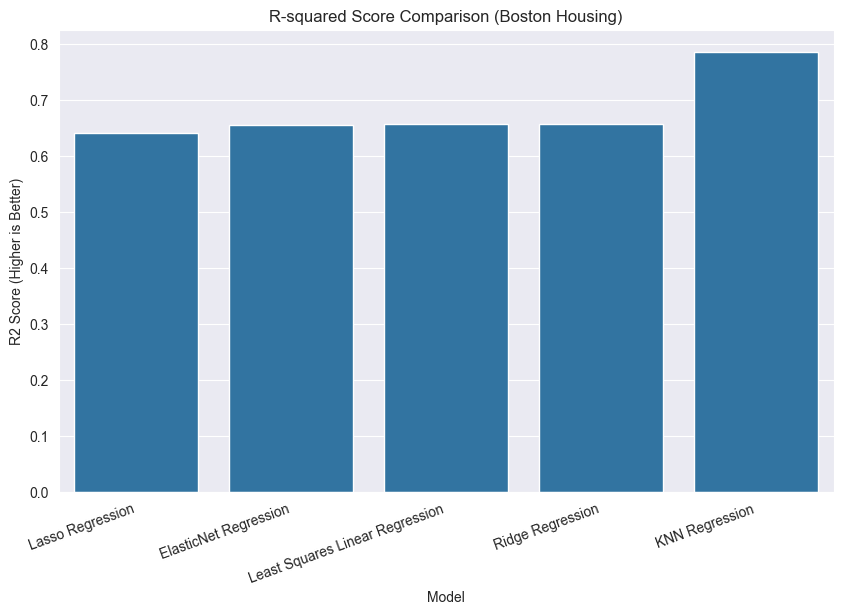

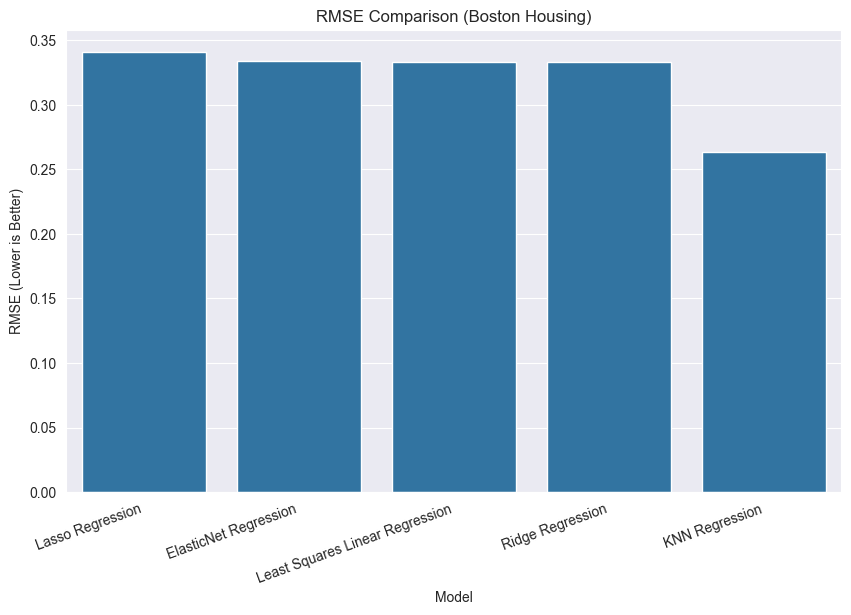

In [324]:
# --- R2 Score Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x=cali_results_df.index, y='R2 Score', data=cali_results_df)
plt.title('R-squared Score Comparison (Boston Housing)')
plt.ylabel('R2 Score (Higher is Better)')
plt.xticks(rotation=20, ha='right')



# --- RMSE Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x=cali_results_df.index, y='RMSE', data=cali_results_df)
plt.title('RMSE Comparison (Boston Housing)')
plt.ylabel('RMSE (Lower is Better)')
plt.xticks(rotation=20, ha='right')


### Plot for comparing predicted vs actual values(for best model-KNN)

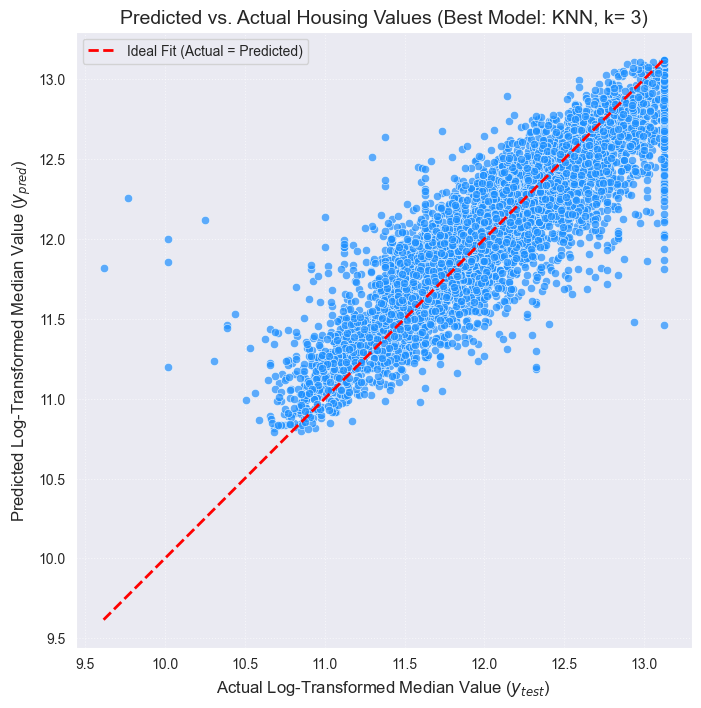

In [325]:
plt.figure(figsize=(8, 8))

# 1. Scatter Plot of Predicted vs. Actual Values
# A perfect model would have all points lie exactly on the 45-degree line.
sns.scatterplot(x=y_test, y=knn_y_pred, color='dodgerblue', alpha=0.7)

# 2. Plot the Ideal Fit Line (45-degree line: Actual = Predicted)
# We find the min and max values to draw a straight line.
min_val = min(y_test.min(), knn_y_pred.min())
max_val = max(y_test.max(), knn_y_pred.max())
ideal_line = np.linspace(min_val, max_val, 100)

plt.plot(ideal_line, ideal_line, color='red', linestyle='--', linewidth=2, label='Ideal Fit (Actual = Predicted)')

# 3. Customizations
plt.title(f'Predicted vs. Actual Housing Values (Best Model: KNN, k= 15)', fontsize=14)
plt.xlabel('Actual Log-Transformed Median Value ($y_{test}$)', fontsize=12)
plt.ylabel('Predicted Log-Transformed Median Value ($y_{pred}$)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
